<div class="row">
  <div class="column">
    <img src="./img/logo-ISAE_SUPAERO.png" width="200">
  </div>
</div>

# [POST-PROCESSING] FAST-OAD with BWB integrated architecture
#### Sandra MUÑOZ 
#### Justo RODRÍGUEZ
#### Miguel VALADAS

Latest update: 26 March 2023

------------------------------------------
This part is dedicated to the generation of graphs and plots. The outputs are directly uploaded from the "Simulation results" folder. To see how these outputs are generate, refer to [SIMULATIONS] Jupyter Notebook. As an example, the wing sweep angle sensitivity analysis is given. 


## 1. Import libraries

In [1]:
# Check if all packages are installed. If not, the program will automatically install the missing ones. 

import importlib.util
import sys
import subprocess
# Packages list
package_names = ['numpy', 'os.path','openmdao.api','logging','shutil','fastoad.api','math','matplotlib.pyplot','plotly.graph_objects','array','time','sys','pandas','qgrid','yaml']
num_packages = len(package_names)

# Function to install package
def install(package):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    
# Test libraries: 
for i in range(num_packages):
    spec = importlib.util.find_spec(package_names[i])
    if spec is None:
        print("-----------ERROR-----------: Package '" + package_names[i] +"'  is not installed.")
        # Install package: 
        install(package_names[i])
        print("-----------UPDATE-----------: Package '" + package_names[i] +"'  is now correctly installed.")
        
    else:
        print("Package '" + package_names[i] + "' is correctly installed.")
        
# Import packages once all of them are correctly installed: 
import openmdao.api as om
from fastoad.module_management.constants import ModelDomain
from fastoad.module_management.service_registry import RegisterOpenMDAOSystem, RegisterSubmodel
import logging
import shutil
import fastoad.api as oad
import os.path as pth
import os
import yaml
from ruamel.yaml import YAML
import matplotlib.pyplot as plt
from IPython.display import Javascript, display, Image, HTML
import numpy as np
import math
import plotly.graph_objects as go
import array
import time
import sys
import pandas as pd
import qgrid


Package 'numpy' is correctly installed.
Package 'os.path' is correctly installed.
Package 'openmdao.api' is correctly installed.
Package 'logging' is correctly installed.
Package 'shutil' is correctly installed.
Package 'fastoad.api' is correctly installed.
Package 'math' is correctly installed.
Package 'matplotlib.pyplot' is correctly installed.
Package 'plotly.graph_objects' is correctly installed.
Package 'array' is correctly installed.
Package 'time' is correctly installed.
Package 'sys' is correctly installed.
Package 'pandas' is correctly installed.
Package 'qgrid' is correctly installed.
Package 'yaml' is correctly installed.


## 2. Directory set up and outputs initialization

In [2]:
# Print the current working directory
directory = "{0}".format(os.getcwd())
print('Directory: ', directory)

# Assign data and work folder paths: 
DATA_FOLDER_PATH = "data"
WORK_FOLDER_PATH = "workspace"
CONFIGURATION_FILE_BWB = pth.join(WORK_FOLDER_PATH, "BWB_configuration.yml")

# Print data and work folder paths: 
print('- Data folder path is: ',directory +'\data')
print('- Work folder path is: ',directory +'\workspace')

# TUBE AND WING CONFIGURATION
# Upload the inputs and outputs directly: 
inputs_tubeWing = pth.join(WORK_FOLDER_PATH, "problem_inputs_tubeWing_saved.xml")
outputs_tubeWing = pth.join(WORK_FOLDER_PATH, "problem_outputs_tubeWing_saved.xml")


# BWB CONFIGURATION
# Example: wing sweep angle simulation parameters: 
print('-------------------------------------------------------------')
print(' SWEEP SIMULATION INFORMATION: ')
print('-------------------------------------------------------------')

sweep_vec = np.linspace(15,35,21)
simDirS = directory +'\workspace\Simulation_results\Sensitivity analysis\Sweep angle\Outputs'
print('- BWB simulations directory is: ', simDirS)
print('- The sweep vector is: ', sweep_vec)

Directory:  e:\KSHITIJ\FastOAD\Code\Swept_Wing_API\BWB\BWB_with_model\FastBWB
- Data folder path is:  e:\KSHITIJ\FastOAD\Code\Swept_Wing_API\BWB\BWB_with_model\FastBWB\data
- Work folder path is:  e:\KSHITIJ\FastOAD\Code\Swept_Wing_API\BWB\BWB_with_model\FastBWB\workspace
-------------------------------------------------------------
 SWEEP SIMULATION INFORMATION: 
-------------------------------------------------------------
- BWB simulations directory is:  e:\KSHITIJ\FastOAD\Code\Swept_Wing_API\BWB\BWB_with_model\FastBWB\workspace\Simulation_results\Sensitivity analysis\Sweep angle\Outputs
- The sweep vector is:  [15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35.]


## 3. Variable viewer

In [3]:
# BWB CONFIFURATION:
print('-------------------------------------------------------------')
print('BWB CONFIGURATION')
print('-------------------------------------------------------------')
oad.variable_viewer(pth.join(simDirS, "problem_outputs_BWB_sweep15.xml")) # sweep_25 = 15deg as an example. 


-------------------------------------------------------------
BWB CONFIGURATION
-------------------------------------------------------------


#### XSDM FILE 

In [4]:
XDSM_FILE = pth.join(WORK_FOLDER_PATH, 'xdsm.html')
oad.write_xdsm(CONFIGURATION_FILE_BWB, XDSM_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=XDSM_FILE, width='100%', height='500px')

e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\Fastenvk1\lib\site-packages\openmdao\visualization\n2_viewer\n2_viewer.py:168: OpenMDAOWarning:All-NaN slice encountered
e:\KSHITIJ\FastOAD\F

Analysis FASTOADModel pushed


#### N2 FILE 

In [5]:
N2_FILE = pth.join(WORK_FOLDER_PATH, "n2.html")
oad.write_n2(CONFIGURATION_FILE_BWB, N2_FILE, overwrite=True)
from IPython.display import IFrame

IFrame(src=N2_FILE, width="100%", height="500px")

## 4. Visualization
#### A. Wing plot - BWB vs. TW - Fastoad code

In [6]:
# BWB
sweep_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep25.xml") #reference case
output_dataBWBsim1 = oad.DataFile(sweep_outputsBWB_directory)

wing_kink_leading_edge_xBWB = output_dataBWBsim1["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWB = output_dataBWBsim1["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWB = output_dataBWBsim1["data:geometry:wing:root:y"].value[0]
wing_kink_yBWB = output_dataBWBsim1["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWB = output_dataBWBsim1["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWB = output_dataBWBsim1["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWB = output_dataBWBsim1["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWB = output_dataBWBsim1["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWB = output_dataBWBsim1["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionBWB = output_dataBWBsim1["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWB = output_dataBWBsim1["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWB = np.array(
    [0, wing_root_yBWB, wing_kink_yBWB, wing_tip_yBWB, wing_tip_yBWB, wing_kink_yBWB, wing_root_yBWB, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWB = np.concatenate((-yBWB, yBWB))

# pylint: disable=invalid-name # that's a common naming
xBWB = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB + wing_tip_chordBWB,
        wing_kink_leading_edge_xBWB + wing_kink_chordBWB,
        wing_root_chordBWB,
        wing_root_chordBWB,
        0,
    ]
)

xBWB = xBWB + mac25_x_positionBWB - 0.25 * mean_aerodynamic_chordBWB - distance_root_mac_chordsBWB
# pylint: disable=invalid-name # that's a common naming
xBWB = np.concatenate((xBWB, xBWB))


# TUBE WING
output_dataTW = oad.DataFile(outputs_tubeWing)
wing_kink_leading_edge_xTW = output_dataTW["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xTW = output_dataTW["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yTW = output_dataTW["data:geometry:wing:root:y"].value[0]
wing_kink_yTW = output_dataTW["data:geometry:wing:kink:y"].value[0]
wing_tip_yTW = output_dataTW["data:geometry:wing:tip:y"].value[0]
wing_root_chordTW = output_dataTW["data:geometry:wing:root:chord"].value[0]
wing_kink_chordTW = output_dataTW["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordTW = output_dataTW["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordTW = output_dataTW["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionTW = output_dataTW["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsTW = output_dataTW["data:geometry:wing:MAC:leading_edge:x:local"].value[0]
# pylint: disable=invalid-name # that's a common naming
yTW = np.array(
    [0, wing_root_yTW, wing_kink_yTW, wing_tip_yTW, wing_tip_yTW, wing_kink_yTW, wing_root_yTW, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yTW = np.concatenate((-yTW, yTW))

# pylint: disable=invalid-name # that's a common naming
xTW = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xTW,
        wing_tip_leading_edge_xTW,
        wing_tip_leading_edge_xTW + wing_tip_chordTW,
        wing_kink_leading_edge_xTW + wing_kink_chordTW,
        wing_root_chordTW,
        wing_root_chordTW,
        0,
    ]
)

xTW = -6 + xTW + mac25_x_positionTW - 0.25 * mean_aerodynamic_chordTW - distance_root_mac_chordsTW
# pylint: disable=invalid-name # that's a common naming
xTW = np.concatenate((xTW, xTW))

print('Output data comes from: \n')
print('- BWB curve:',sweep_outputsBWB_directory)
print('\n - TW curve:',outputs_tubeWing)

# CREATE FIGURE

fig = go.Figure()

scatterBWB = go.Scatter(x=yBWB, y=xBWB, mode="lines+markers", name='BWB')

fig.add_trace(scatterBWB)

scatterTW = go.Scatter(x=yTW, y=xTW, mode="lines+markers", name='Tube and wing')

fig.add_trace(scatterTW)

fig.layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))

fig = go.FigureWidget(fig)

fig.update_layout(title_text="Wing Geometry", title_x=0.5, xaxis_title="y [m]", yaxis_title="x [m]",showlegend = True)

fig.show()


Output data comes from: 

- BWB curve: e:\KSHITIJ\FastOAD\Code\Swept_Wing_API\BWB\BWB_with_model\FastBWB\workspace\Simulation_results\Sensitivity analysis\Sweep angle\Outputs\problem_outputs_BWB_sweep25.xml

 - TW curve: workspace\problem_outputs_tubeWing_saved.xml


#### Wing plot BWB sweep effect: 15,20,25,30,35 deg

In [7]:
# BWB sweep 15
sweep15_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep15.xml")
output_dataBWBs15 = oad.DataFile(sweep15_outputsBWB_directory)

wing_kink_leading_edge_xBWBs15 = output_dataBWBs15["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWBs15 = output_dataBWBs15["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWBs15 = output_dataBWBs15["data:geometry:wing:root:y"].value[0]
wing_kink_yBWBs15 = output_dataBWBs15["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWBs15 = output_dataBWBs15["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWBs15 = output_dataBWBs15["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWBs15 = output_dataBWBs15["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWBs15 = output_dataBWBs15["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWBs15 = output_dataBWBs15["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionBWBs15 = output_dataBWBs15["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWBs15 = output_dataBWBs15["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWBs15 = np.array(
    [0, wing_root_yBWBs15, wing_kink_yBWBs15, wing_tip_yBWBs15, wing_tip_yBWBs15, wing_kink_yBWBs15, wing_root_yBWBs15, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWBs15 = np.concatenate((-yBWBs15, yBWBs15))

# pylint: disable=invalid-name # that's a common naming
xBWBs15 = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWBs15,
        wing_tip_leading_edge_xBWBs15,
        wing_tip_leading_edge_xBWBs15 + wing_tip_chordBWBs15,
        wing_kink_leading_edge_xBWBs15 + wing_kink_chordBWBs15,
        wing_root_chordBWBs15,
        wing_root_chordBWBs15,
        0,
    ]
)

xBWBs15 = xBWBs15 + mac25_x_positionBWBs15 - 0.25 * mean_aerodynamic_chordBWBs15 - distance_root_mac_chordsBWBs15
# pylint: disable=invalid-name # that's a common naming
xBWBs15 = np.concatenate((xBWBs15, xBWBs15))

# BWB sweep 20
sweep20_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep20.xml")
output_dataBWBs20 = oad.DataFile(sweep20_outputsBWB_directory)

wing_kink_leading_edge_xBWBs20 = output_dataBWBs20["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWBs20 = output_dataBWBs20["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWBs20 = output_dataBWBs20["data:geometry:wing:root:y"].value[0]
wing_kink_yBWBs20 = output_dataBWBs20["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWBs20 = output_dataBWBs20["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWBs20 = output_dataBWBs20["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWBs20 = output_dataBWBs20["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWBs20 = output_dataBWBs20["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWBs20 = output_dataBWBs20["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionBWBs20 = output_dataBWBs20["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWBs20 = output_dataBWBs20["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWBs20 = np.array(
    [0, wing_root_yBWBs20, wing_kink_yBWBs20, wing_tip_yBWBs20, wing_tip_yBWBs20, wing_kink_yBWBs20, wing_root_yBWBs20, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWBs20 = np.concatenate((-yBWBs20, yBWBs20))

# pylint: disable=invalid-name # that's a common naming
xBWBs20 = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWBs20,
        wing_tip_leading_edge_xBWBs20,
        wing_tip_leading_edge_xBWBs20 + wing_tip_chordBWBs20,
        wing_kink_leading_edge_xBWBs20 + wing_kink_chordBWBs20,
        wing_root_chordBWBs20,
        wing_root_chordBWBs20,
        0,
    ]
)

xBWBs20 = xBWBs20 + mac25_x_positionBWBs20 - 0.25 * mean_aerodynamic_chordBWBs20 - distance_root_mac_chordsBWBs20
# pylint: disable=invalid-name # that's a common naming
xBWBs20 = np.concatenate((xBWBs20, xBWBs20))
# BWB sweep 25
sweep25_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep25.xml")
output_dataBWBs25 = oad.DataFile(sweep25_outputsBWB_directory)

wing_kink_leading_edge_xBWBs25 = output_dataBWBs25["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWBs25 = output_dataBWBs25["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWBs25 = output_dataBWBs25["data:geometry:wing:root:y"].value[0]
wing_kink_yBWBs25 = output_dataBWBs25["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWBs25 = output_dataBWBs25["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWBs25 = output_dataBWBs25["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWBs25 = output_dataBWBs25["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWBs25 = output_dataBWBs25["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWBs25 = output_dataBWBs25["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionBWBs25 = output_dataBWBs25["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWBs25 = output_dataBWBs25["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWBs25 = np.array(
    [0, wing_root_yBWBs25, wing_kink_yBWBs25, wing_tip_yBWBs25, wing_tip_yBWBs25, wing_kink_yBWBs25, wing_root_yBWBs25, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWBs25 = np.concatenate((-yBWBs25, yBWBs25))

# pylint: disable=invalid-name # that's a common naming
xBWBs25 = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWBs25,
        wing_tip_leading_edge_xBWBs25,
        wing_tip_leading_edge_xBWBs25 + wing_tip_chordBWBs25,
        wing_kink_leading_edge_xBWBs25 + wing_kink_chordBWBs25,
        wing_root_chordBWBs25,
        wing_root_chordBWBs25,
        0,
    ]
)

xBWBs25 = xBWBs25 + mac25_x_positionBWBs25 - 0.25 * mean_aerodynamic_chordBWBs25 - distance_root_mac_chordsBWBs25
# pylint: disable=invalid-name # that's a common naming
xBWBs25 = np.concatenate((xBWBs25, xBWBs25))

# BWB sweep 30
sweep30_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep30.xml")
output_dataBWBs30 = oad.DataFile(sweep30_outputsBWB_directory)

wing_kink_leading_edge_xBWBs30 = output_dataBWBs30["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWBs30 = output_dataBWBs30["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWBs30 = output_dataBWBs30["data:geometry:wing:root:y"].value[0]
wing_kink_yBWBs30 = output_dataBWBs30["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWBs30 = output_dataBWBs30["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWBs30 = output_dataBWBs30["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWBs30 = output_dataBWBs30["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWBs30 = output_dataBWBs30["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWBs30 = output_dataBWBs30["data:geometry:wing:MAC:length"].value[0]
mac30_x_positionBWBs30 = output_dataBWBs30["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWBs30 = output_dataBWBs30["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWBs30 = np.array(
    [0, wing_root_yBWBs30, wing_kink_yBWBs30, wing_tip_yBWBs30, wing_tip_yBWBs30, wing_kink_yBWBs30, wing_root_yBWBs30, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWBs30 = np.concatenate((-yBWBs30, yBWBs30))

# pylint: disable=invalid-name # that's a common naming
xBWBs30 = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWBs30,
        wing_tip_leading_edge_xBWBs30,
        wing_tip_leading_edge_xBWBs30 + wing_tip_chordBWBs30,
        wing_kink_leading_edge_xBWBs30 + wing_kink_chordBWBs30,
        wing_root_chordBWBs30,
        wing_root_chordBWBs30,
        0,
    ]
)

xBWBs30 = xBWBs30 + mac30_x_positionBWBs30 - 0.30 * mean_aerodynamic_chordBWBs30 - distance_root_mac_chordsBWBs30
# pylint: disable=invalid-name # that's a common naming
xBWBs30 = np.concatenate((xBWBs30, xBWBs30))

# BWB sweep 35
sweep35_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep35.xml")
output_dataBWBs35 = oad.DataFile(sweep35_outputsBWB_directory)

wing_kink_leading_edge_xBWBs35 = output_dataBWBs35["data:geometry:wing:kink:leading_edge:x:local"].value[0]
wing_tip_leading_edge_xBWBs35 = output_dataBWBs35["data:geometry:wing:tip:leading_edge:x:local"].value[0]
wing_root_yBWBs35 = output_dataBWBs35["data:geometry:wing:root:y"].value[0]
wing_kink_yBWBs35 = output_dataBWBs35["data:geometry:wing:kink:y"].value[0]
wing_tip_yBWBs35 = output_dataBWBs35["data:geometry:wing:tip:y"].value[0]
wing_root_chordBWBs35 = output_dataBWBs35["data:geometry:wing:root:chord"].value[0]
wing_kink_chordBWBs35 = output_dataBWBs35["data:geometry:wing:kink:chord"].value[0]
wing_tip_chordBWBs35 = output_dataBWBs35["data:geometry:wing:tip:chord"].value[0]

mean_aerodynamic_chordBWBs35 = output_dataBWBs35["data:geometry:wing:MAC:length"].value[0]
mac25_x_positionBWBs35 = output_dataBWBs35["data:geometry:wing:MAC:at25percent:x"].value[0]
distance_root_mac_chordsBWBs35 = output_dataBWBs35["data:geometry:wing:MAC:leading_edge:x:local"].value[0]



# pylint: disable=invalid-name # that's a common naming
yBWBs35 = np.array(
    [0, wing_root_yBWBs35, wing_kink_yBWBs35, wing_tip_yBWBs35, wing_tip_yBWBs35, wing_kink_yBWBs35, wing_root_yBWBs35, 0, 0]
)
# pylint: disable=invalid-name # that's a common naming
yBWBs35 = np.concatenate((-yBWBs35, yBWBs35))

# pylint: disable=invalid-name # that's a common naming
xBWBs35 = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWBs35,
        wing_tip_leading_edge_xBWBs35,
        wing_tip_leading_edge_xBWBs35 + wing_tip_chordBWBs35,
        wing_kink_leading_edge_xBWBs35 + wing_kink_chordBWBs35,
        wing_root_chordBWBs35,
        wing_root_chordBWBs35,
        0,
    ]
)

xBWBs35 = xBWBs35 + mac25_x_positionBWBs35 - 0.25 * mean_aerodynamic_chordBWBs35 - distance_root_mac_chordsBWBs35
# pylint: disable=invalid-name # that's a common naming
xBWBs35 = np.concatenate((xBWBs35, xBWBs35))

######################


# CREATE FIGURE

fig = go.Figure()

scatterBWBs15 = go.Scatter(x=yBWBs15, y=xBWBs15, mode="lines+markers", name='Sweep 15°')

fig.add_trace(scatterBWBs15)

scatterBWBs20 = go.Scatter(x=yBWBs20, y=xBWBs20, mode="lines+markers", name='Sweep 20°')

fig.add_trace(scatterBWBs20)

scatterBWBs25 = go.Scatter(x=yBWBs25, y=xBWBs25, mode="lines+markers", name='Sweep 25°')

fig.add_trace(scatterBWBs25)

scatterBWBs30 = go.Scatter(x=yBWBs30, y=xBWBs30, mode="lines+markers", name='Sweep 30°')

fig.add_trace(scatterBWBs30)

scatterBWBs35 = go.Scatter(x=yBWBs35, y=xBWBs35, mode="lines+markers", name='Sweep 35°')

fig.add_trace(scatterBWBs35)

fig.layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))

fig = go.FigureWidget(fig)

# fig.update_layout(title_text="BWB Wing Geometry", title_x=0.5, xaxis_title="y [m]", yaxis_title="x [m]",showlegend = True)
fig.update_layout(
    title_text="Sweep effect",
    title_x=0.5,
    xaxis_title="y [m]",
    yaxis_title="x[m]",
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[-20, 20],
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[0, 30],
        tickfont=dict(size=10)
    )
)

fig.show()

#### B. Aircraft plot

In [8]:
# BWB or TW aircraft, individual: 
# print('-------------------------------------------------------------')
# print('BWB CONFIGURATION')
# print('-------------------------------------------------------------')
# fig = oad.aircraft_geometry_plot(pth.join(simDirR, "problem_outputs_BWB_range2750.xml"))
# fig.show()

# print('-------------------------------------------------------------')
# print('TW CONFIGURATION')
# print('-------------------------------------------------------------')
# fig = oad.aircraft_geometry_plot(outputs_tubeWing)
# fig.show()

In [9]:
# BWB
y_wingBWB = np.array(
    [0, wing_root_yBWB, wing_kink_yBWB, wing_tip_yBWB, wing_tip_yBWB, wing_kink_yBWB, wing_root_yBWB, 0, 0]
)

x_wingBWB = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB + wing_tip_chordBWB,
        wing_kink_leading_edge_xBWB + wing_kink_chordBWB,
        wing_root_chordBWB,
        wing_root_chordBWB,
        0,
    ]
)
"""
#####################################
# Horizontal Tail parameters - NOT INTERESTED IN THIS FOR A BWB, ALL SET TO ZERO!! (non existent tail!! )
# ht_root_chord = variables["data:geometry:horizontal_tail:root:chord"].value[0]
# ht_tip_chord = variables["data:geometry:horizontal_tail:tip:chord"].value[0]
# ht_span = variables["data:geometry:horizontal_tail:span"].value[0]
# ht_sweep_0 = variables["data:geometry:horizontal_tail:sweep_0"].value[0]

# ht_tip_leading_edge_x = ht_span / 2.0 * np.tan(ht_sweep_0 * np.pi / 180.0)

# y_ht = np.array([0, ht_span / 2.0, ht_span / 2.0, 0.0, 0.0])

# x_ht = np.array(
#     [0, ht_tip_leading_edge_x, ht_tip_leading_edge_x + ht_tip_chord, ht_root_chord, 0]
# )
########################################
"""
# Fuselage parameters
fuselage_max_widthBWB = output_dataBWBsim1["data:geometry:fuselage:maximum_width"].value[0]
fuselage_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:length"].value[0]
fuselage_front_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:front_length"].value[0]
fuselage_rear_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:rear_length"].value[0]

x_fuselageBWB = np.array(
    [
        0.0,
        0.0,
        fuselage_front_lengthBWB,
        fuselage_lengthBWB - fuselage_rear_lengthBWB,
        fuselage_lengthBWB,
        fuselage_lengthBWB,
    ]
)

y_fuselageBWB = np.array(
    [
        0.0,
        fuselage_max_widthBWB / 4.0,
        fuselage_max_widthBWB / 2.0,
        fuselage_max_widthBWB / 2.0,
        fuselage_max_widthBWB / 4.0,
        0.0,
    ]
)

# CGs
wing_25mac_xBWB = output_dataBWBsim1["data:geometry:wing:MAC:at25percent:x"].value[0]
wing_mac_lengthBWB = output_dataBWBsim1["data:geometry:wing:MAC:length"].value[0]
local_wing_mac_le_xBWB = output_dataBWBsim1["data:geometry:wing:MAC:leading_edge:x:local"].value[0]
local_ht_25mac_xBWB = output_dataBWBsim1["data:geometry:horizontal_tail:MAC:at25percent:x:local"].value[0]
ht_distance_from_wingBWB = output_dataBWBsim1[
    "data:geometry:horizontal_tail:MAC:at25percent:x:from_wingMAC25"
].value[0]

x_wingBWB = x_wingBWB + wing_25mac_xBWB - 0.25 * wing_mac_lengthBWB - local_wing_mac_le_xBWB
# x_ht = x_ht + wing_25mac_x + ht_distance_from_wing - local_ht_25mac_x # WON'T BE CONSIDERED FOR A BWB

# pylint: disable=invalid-name # that's a common naming
# x = np.concatenate((x_fuselage, x_wing, x_ht)) # ORIGINAL CODE, TUBE WING
xBWB = np.concatenate((x_fuselageBWB, x_wingBWB)) # BWB CONFIG, NO HT!!

# pylint: disable=invalid-name # that's a common naming
# y = np.concatenate((y_fuselage, y_wing, y_ht))
yBWB = np.concatenate((y_fuselageBWB, y_wingBWB))

# pylint: disable=invalid-name # that's a common naming
yBWB = np.concatenate((-yBWB, yBWB))
# pylint: disable=invalid-name # that's a common naming
xBWB = np.concatenate((xBWB, xBWB))

################# 
# TUBE AND WING
y_wingTW = np.array(
    [0, wing_root_yTW, wing_kink_yTW, wing_tip_yTW, wing_tip_yTW, wing_kink_yTW, wing_root_yTW, 0, 0]
)

x_wingTW = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xTW,
        wing_tip_leading_edge_xTW,
        wing_tip_leading_edge_xTW + wing_tip_chordTW,
        wing_kink_leading_edge_xTW + wing_kink_chordTW,
        wing_root_chordTW,
        wing_root_chordTW,
        0,
    ]
)

#####################################
# Horizontal Tail parameters - NOT INTERESTED IN THIS FOR A TW, ALL SET TO ZERO!! (non existent tail!! )
ht_root_chordTW = output_dataTW["data:geometry:horizontal_tail:root:chord"].value[0]
ht_tip_chordTW = output_dataTW["data:geometry:horizontal_tail:tip:chord"].value[0]
ht_spanTW = output_dataTW["data:geometry:horizontal_tail:span"].value[0]
ht_sweep_0TW = output_dataTW["data:geometry:horizontal_tail:sweep_0"].value[0]

ht_tip_leading_edge_xTW = ht_spanTW / 2.0 * np.tan(ht_sweep_0TW * np.pi / 180.0)

y_htTW = np.array([0, ht_spanTW / 2.0, ht_spanTW / 2.0, 0.0, 0.0])

x_htTW = np.array(
    [0, ht_tip_leading_edge_xTW, ht_tip_leading_edge_xTW + ht_tip_chordTW, ht_root_chordTW, 0]
)
########################################

# Fuselage parameters
fuselage_max_widthTW = output_dataTW["data:geometry:fuselage:maximum_width"].value[0]
fuselage_lengthTW = output_dataTW["data:geometry:fuselage:length"].value[0]
fuselage_front_lengthTW = output_dataTW["data:geometry:fuselage:front_length"].value[0]
fuselage_rear_lengthTW = output_dataTW["data:geometry:fuselage:rear_length"].value[0]

x_fuselageTW = np.array(
    [
        0.0,
        0.0,
        fuselage_front_lengthTW,
        fuselage_lengthTW - fuselage_rear_lengthTW,
        fuselage_lengthTW,
        fuselage_lengthTW,
    ]
)

y_fuselageTW = np.array(
    [
        0.0,
        fuselage_max_widthTW / 4.0,
        fuselage_max_widthTW / 2.0,
        fuselage_max_widthTW / 2.0,
        fuselage_max_widthTW / 4.0,
        0.0,
    ]
)

# CGs
wing_25mac_xTW = output_dataTW["data:geometry:wing:MAC:at25percent:x"].value[0]
wing_mac_lengthTW = output_dataTW["data:geometry:wing:MAC:length"].value[0]
local_wing_mac_le_xTW = output_dataTW["data:geometry:wing:MAC:leading_edge:x:local"].value[0]
local_ht_25mac_xTW = output_dataTW["data:geometry:horizontal_tail:MAC:at25percent:x:local"].value[0]
ht_distance_from_wingTW = output_dataTW[
    "data:geometry:horizontal_tail:MAC:at25percent:x:from_wingMAC25"
].value[0]

x_wingTW = x_wingTW + wing_25mac_xTW - 0.25 * wing_mac_lengthTW - local_wing_mac_le_xTW
x_htTW = x_htTW + wing_25mac_xTW + ht_distance_from_wingTW - local_ht_25mac_xTW # WON'T BE CONSIDERED FOR A TW

# pylint: disable=invalid-name # that's a common naming
xTW = np.concatenate((x_fuselageTW, x_wingTW, x_htTW)) # ORIGINAL CODE, TUBE WING
# xTW = np.concatenate((x_fuselageTW, x_wingTW)) # TW CONFIG, NO HT!!

# pylint: disable=invalid-name # that's a common naming
yTW = np.concatenate((y_fuselageTW, y_wingTW, y_htTW))
# yTW = np.concatenate((y_fuselageTW, y_wingTW))

# pylint: disable=invalid-name # that's a common naming
yTW = np.concatenate((-yTW, yTW))
# pylint: disable=invalid-name # that's a common naming
xTW = np.concatenate((xTW, xTW))


# PLOT FIGURE
fig = go.Figure()

scatterBWB = go.Scatter(x=yBWB, y=xBWB, mode="lines+markers", name="BWB")
fig.add_trace(scatterBWB)

scatterTW = go.Scatter(x=yTW, y=xTW, mode="lines+markers", name="Tube and wing")
fig.add_trace(scatterTW)

fig.layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))

fig = go.FigureWidget(fig)

# fig.update_layout(title_text="Aircraft Geometry", title_x=0.5, xaxis_title="y [m]", yaxis_title="x[m]", showlegend = True)

fig.update_layout(
    title_text="Aircraft Geometry",
    title_x=0.5,
    xaxis_title="y [m]",
    yaxis_title="x[m]",
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom'
    ),
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[-10, 13],
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        range=[0, 40],
        tickfont=dict(size=10)
    )
)

fig.show()


In [14]:
# BWB
y_wingBWB = np.array(
    [0, wing_root_yBWB, wing_kink_yBWB, wing_tip_yBWB, wing_tip_yBWB, wing_kink_yBWB, wing_root_yBWB, 0, 0]
)

x_wingBWB = np.array(
    [
        0,
        0,
        wing_kink_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB,
        wing_tip_leading_edge_xBWB + wing_tip_chordBWB,
        wing_kink_leading_edge_xBWB + wing_kink_chordBWB,
        wing_root_chordBWB,
        wing_root_chordBWB,
        0,
    ]
)
print(x_wingBWB)
# Fuselage parameters
fuselage_max_widthBWB = output_dataBWBsim1["data:geometry:fuselage:maximum_width"].value[0]
fuselage_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:length"].value[0]
fuselage_front_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:front_length"].value[0]
fuselage_rear_lengthBWB = output_dataBWBsim1["data:geometry:fuselage:rear_length"].value[0]

x_fuselageBWB = np.array(
    [
        0.0,
        0.0,
        fuselage_front_lengthBWB,
        fuselage_lengthBWB - fuselage_rear_lengthBWB,
        fuselage_lengthBWB,
        fuselage_lengthBWB,
    ]
)

y_fuselageBWB = np.array(
    [
        0.0,
        fuselage_max_widthBWB / 4.0,
        fuselage_max_widthBWB / 2.0,
        fuselage_max_widthBWB / 2.0,
        fuselage_max_widthBWB / 4.0,
        0.0,
    ]
)

# CGs
wing_25mac_xBWB = output_dataBWBsim1["data:geometry:wing:MAC:at25percent:x"].value[0]
wing_mac_lengthBWB = output_dataBWBsim1["data:geometry:wing:MAC:length"].value[0]
local_wing_mac_le_xBWB = output_dataBWBsim1["data:geometry:wing:MAC:leading_edge:x:local"].value[0]
local_ht_25mac_xBWB = output_dataBWBsim1["data:geometry:horizontal_tail:MAC:at25percent:x:local"].value[0]
ht_distance_from_wingBWB = output_dataBWBsim1[
    "data:geometry:horizontal_tail:MAC:at25percent:x:from_wingMAC25"
].value[0]

x_wingBWB = x_wingBWB + wing_25mac_xBWB - 0.25 * wing_mac_lengthBWB - local_wing_mac_le_xBWB
# x_ht = x_ht + wing_25mac_x + ht_distance_from_wing - local_ht_25mac_x # WON'T BE CONSIDERED FOR A BWB
print(x_wingBWB)
# pylint: disable=invalid-name # that's a common naming
# x = np.concatenate((x_fuselage, x_wing, x_ht)) # ORIGINAL CODE, TUBE WING
xBWB = np.concatenate((x_fuselageBWB, x_wingBWB)) # BWB CONFIG, NO HT!!

# pylint: disable=invalid-name # that's a common naming
# y = np.concatenate((y_fuselage, y_wing, y_ht))
yBWB = np.concatenate((y_fuselageBWB, y_wingBWB))

# pylint: disable=invalid-name # that's a common naming
yBWB = np.concatenate((-yBWB, yBWB))
# pylint: disable=invalid-name # that's a common naming
xBWB = np.concatenate((xBWB, xBWB))

[ 0.          0.          1.63739325  8.44321944 14.57406643 15.83132727
 16.13380787 16.13380787  0.        ]
[ 3.47132916  3.47132916  5.10872241 11.9145486  18.04539559 19.30265642
 19.60513702 19.60513702  3.47132916]


#### C. Drag polar plot

In [10]:
# BWB
output_dataTW = oad.DataFile(outputs_tubeWing)

sweep_outputsBWB_directory = pth.join(simDirS, "problem_outputs_BWB_sweep25.xml")
output_dataBWBsim1 = oad.DataFile(sweep_outputsBWB_directory)
# BWB DATA
cdBWB = np.asarray(output_dataBWBsim1["data:aerodynamics:aircraft:cruise:CD"].value)
clBWB = np.asarray(output_dataBWBsim1["data:aerodynamics:aircraft:cruise:CL"].value)
cd_shortBWB = cdBWB[cdBWB <= 0.5]
cl_shortBWB = clBWB[cdBWB <= 0.5]

# TUBE AND WING DATA
cdTW = np.asarray(output_dataTW["data:aerodynamics:aircraft:cruise:CD"].value)
clTW = np.asarray(output_dataTW["data:aerodynamics:aircraft:cruise:CL"].value)
cd_shortTW = cdTW[cdTW <= 0.5]
cl_shortTW = clTW[cdTW <= 0.5]

# PLOT FIGURE
fig = go.Figure()

scatterBWB = go.Scatter(x=cd_shortBWB, y=cl_shortBWB, mode="lines+markers", name="BWB")
fig.add_trace(scatterBWB)

scatterTW = go.Scatter(x=cd_shortTW, y=cl_shortTW, mode="lines+markers", name="Tube and wing")
fig.add_trace(scatterTW)

fig.update_layout(title_text="Drag Polar", title_x=0.5, xaxis_title="Cd", yaxis_title="Cl", 
                  width=600, height=600)

fig.show()



##### D. Mass breakdown plot

In [11]:
print('-------------------------------------------------------------')
print('BWB CONFIGURATION')
print('-------------------------------------------------------------')
fig = oad.mass_breakdown_bar_plot(pth.join(simDirS, "problem_outputs_BWB_sweep25.xml"))
fig.show()

fig = oad.mass_breakdown_sun_plot(pth.join(simDirS, "problem_outputs_BWB_sweep25.xml"))
fig.show()

-------------------------------------------------------------
BWB CONFIGURATION
-------------------------------------------------------------


#### E. Block fuel vs. sweep

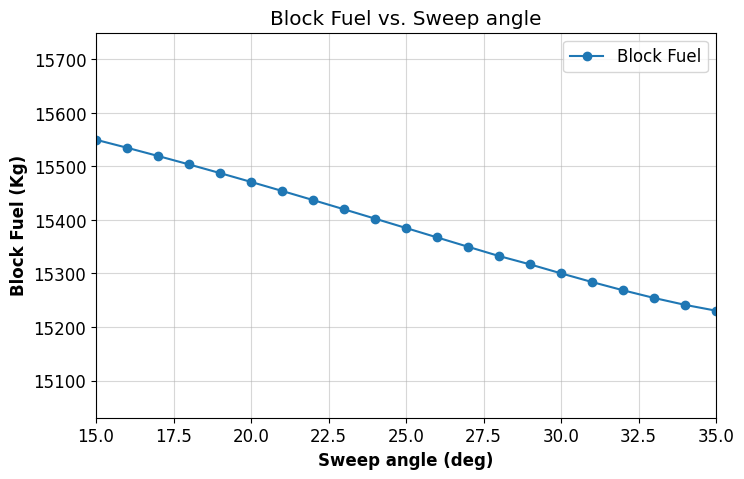

In [12]:
block_fuel = []
i = 0
while i < len(sweep_vec):
    output_dataBWBsim = oad.DataFile(pth.join(simDirS, "problem_outputs_BWB_sweep%d.xml"%(sweep_vec[i])))
    new_fuel = output_dataBWBsim["data:weight:aircraft:sizing_block_fuel"].value[0]
    block_fuel.append(new_fuel)
    i += 1

min_fuel = min(block_fuel)
min_fuel -= 200
max_fuel = max(block_fuel)
max_fuel += 200

# Set font size
plt.rcParams.update({'font.size': 12})

# Define figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Add title
plt.title("Block Fuel vs. Sweep angle")

# Plot data
ax.plot(sweep_vec, block_fuel, marker='o', label="Block Fuel")

# Add grid lines
ax.grid(alpha=0.5)

# Change marker style
# ax.plot(range_vec, block_fuel, marker='s', label="Block Fuel") # Square markers
# ax.plot(range_vec, block_fuel, marker='^', label="Block Fuel") # Triangle markers

# Add axis labels
ax.set_xlabel("Sweep angle (deg)", weight='bold')
ax.set_ylabel("Block Fuel (Kg)", weight='bold')

# Set axis limits
ax.set_xlim([min(sweep_vec), max(sweep_vec)])
ax.set_ylim([min_fuel, max_fuel])

# Add legend
ax.legend()
plt.show()

